# Data Analysis using Python

# Introduction to Classification
## Analytics Mantra
## Machine Learning- Logistic Regression

# To Predict whether a patient has diabetes or not?

## Data set - PIMA Indian Diabetes Dataset



In [1]:
import pandas as pd
import os
os.chdir("C:/Users/shivam/Desktop")

col_names  = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]

In [2]:
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Description

For Each Attribute: (all numeric-valued)

Number of times pregnant

Plasma glucose concentration a 2 hours in an oral glucose tolerance test

Diastolic blood pressure (mm Hg)

Triceps skin fold thickness (mm)

2-Hour serum insulin (mu U/ml)

Body mass index (weight in kg/(height in m)^2)

Diabetes pedigree function

Age (years)

Class variable (0 or 1)

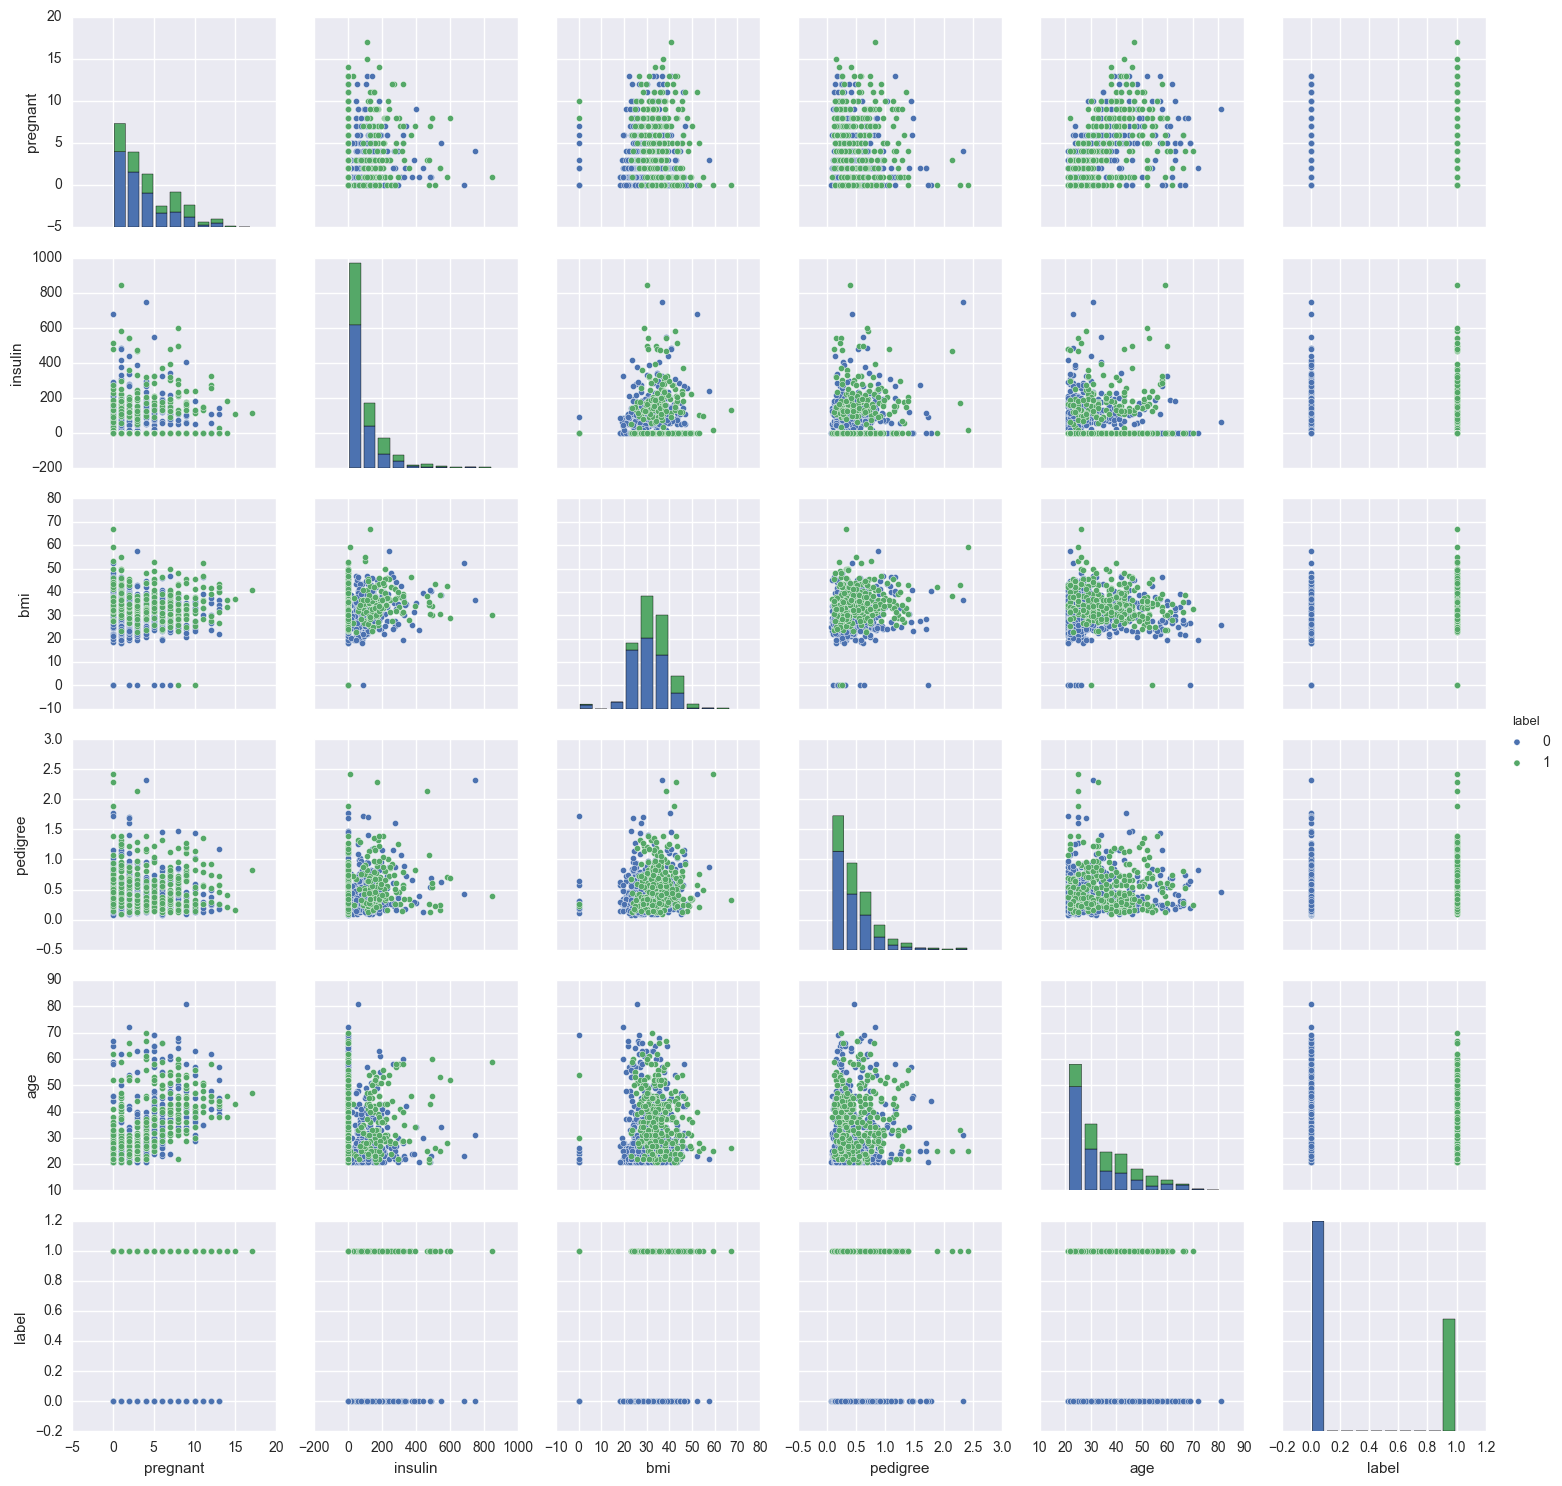

In [3]:
%matplotlib inline
import seaborn as sns
sns.set()
fetaure_cols = ["pregnant", "insulin", "bmi", "pedigree", "age", "label"]
pima_data = pima[fetaure_cols]
sns.pairplot(pima_data, hue = 'label')
figsize = (12,12)

In [4]:
# Splitting the data
feature_cols = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age"]
X = pima[feature_cols]
y = pima["label"]

## Splitting the dataset into test and train dataset


In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\shivam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
y_pred_class = logreg.predict(X_test)

In [10]:
# Calculating the Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

0.78125


In [11]:
# Confusion Metrics

print(metrics.confusion_matrix(y_test,y_pred_class))

[[110  13]
 [ 29  40]]


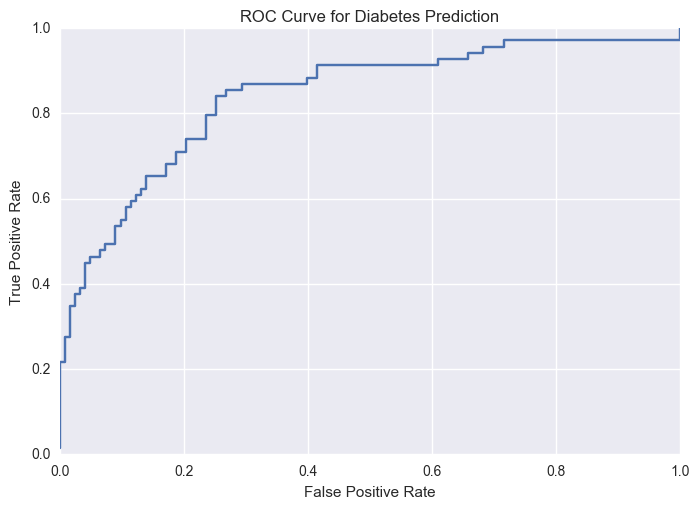

In [12]:
# ROC CURVE AND AREA under the curve

# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

import matplotlib.pyplot as plt
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC Curve for Diabetes Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

In [13]:
print(metrics.roc_auc_score(y_test,y_pred_prob))

0.839990573819
